# Linear Transformation

In definin **Liner Transformation**, there is two term, **Linear** And **Transformation**

First we see what is **Transformation**?:
Its just an another word as like Function(**_f_**) which takes some input and gives an output. Here in transformation it takes input as a vector $(\vec{u})$ and gives out another vector $(\vec{v})$.

$$\begin{bmatrix} 2 \\ 3 \end{bmatrix}\quad \quad \quad \quad \quad \quad L(\vec{V}) \quad \quad \quad \quad \quad \begin{bmatrix} -3 \\ 2 \end{bmatrix}$$
$$ \quad    Input Vector \quad  \quad Transformation \quad  \quad  Output Vector$$




[-3  2]


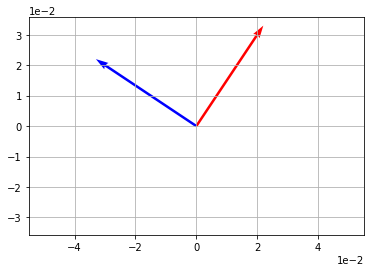

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([2,3])# Input Vector(red)
s = np.array([-3,2])# transformed vector(blue)
print (s)

# Plot v and s
vecs = np.array([v,s])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b'], scale=10)
#plt.quiver(*origin, vecs[:,1], vecs[:,0], color=['r', 'b'], scale=10)
plt.show()

#### What a vector represents?
It represents a point with refrence to origin(or in other case any other point).
In case of 2-d(as explained earlier in vector) it represents a point in the plane as how much step of x-unit vector(i cap) and how much step of y-axis vector(j cap), it takes to the specific point. 

So what happen exactly in transformation?-- That we watch every point in the space moving to some another point.

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc

# Display matplotlib animations as HTML5 videos in a Jupyter Notebook
rc('animation', html='html5')

def animate_transform(A, grid=None, num_steps=50, repeat=False):
    """
        Animates the effect a transform has on a given grid.
        If no grid is given, one will be generated.

        You can expect a small delay while the function generates the animation.
    """
    def colorizer(x, y):
        """Map x-y coordinates to a unique rgb color"""
        r = min(1, 1 - y/3)
        g = min(1, 1 + y/3)
        b = 1/4 + x/16
        return r, g, b

    def stepwise_transform(A, grid, num_steps):
        """
            Returns a list of transformed grids,
            stepping slowly from the given `grid` to
            the grid `A @ grid`.
        """
        # create empty array of the right size
        transgrid = np.zeros((num_steps + 1, ) + np.shape(grid))
        # compute intermediate transforms
        for i in range(num_steps + 1):
            intermediate = np.eye(2) + i / num_steps * (A - np.eye(2))
            # apply intermediate matrix transformation
            transgrid[i] = intermediate @ grid
        return transgrid

    if grid is None:
        # Create a grid of points in x-y space
        xvals = np.linspace(-4, 4, 9)
        yvals = np.linspace(-3, 3, 7)
        grid = np.column_stack([[x, y] for x in xvals for y in yvals])

    # Map grid coordinates to colors. Done only for xygrid, not all grids.
    colors = list(map(colorizer, grid[0], grid[1]))
    intermediate_transforms = stepwise_transform(A, grid, num_steps)
    fig = plt.figure(figsize=(6, 6))

    xmin = min(min(grid[0]), min(intermediate_transforms[-1][0]))
    xmax = max(max(grid[0]), max(intermediate_transforms[-1][0]))
    ymin = min(min(grid[1]), min(intermediate_transforms[-1][1]))
    ymax = max(max(grid[1]), max(intermediate_transforms[-1][1]))

    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    scatter = ax.scatter([], [], c=colors)
    # Prevent `%matplotlib inline` from displaying the above scatter plot.
    plt.close()

    def update(i):
        """Draws the ith intermediate transform"""
        scatter.set_offsets(intermediate_transforms[i].T)
        return scatter

    return animation.FuncAnimation(fig,
                                   update,
                                   interval=50,
                                   frames=num_steps,
                                   blit=True,
                                   repeat=repeat)

ValueError: 'c' argument has 63 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

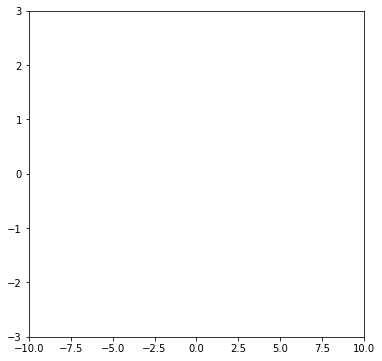

In [29]:
A = np.column_stack([[1, 0], [2, 1]])
anim = animate_transform(A, repeat=True)
anim.save('shear.mp4')
anim

ValueError: 'c' argument has 63 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

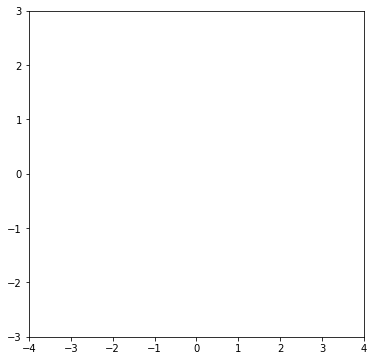

In [31]:
B = np.column_stack([[1, 0], [0, 0]])
anim = animate_transform(B, repeat=True)
anim.save('projection.mp4')
anim